<a href="https://colab.research.google.com/github/mralamdari/Python-Projects/blob/main/Data_PreProccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import xgboost
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn import ensemble
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection
%matplotlib inline


# To use This projects github ource, use this command
# !wget https://raw.githubusercontent.com/rwrdvsqaesdfh32s/datapreprocessing/main/esi_datapreproccessing.py
# import esi_datapreproccessing as dpp

#Creating Data 

##Classification

In [ ]:
# x, y =  data00, n_featurex, y =  datasets.make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
xd = pd.DataFrame(x)
yd = pd.DataFrame(y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(xd, y, random_state=42, test_size=0.5)

In [ ]:
#create a data of combination of x and the target(y)
data = xd.copy()
data[10] = yd

##Regression

In [ ]:
X, Y = datasets.make_regression(n_samples=1000, n_features=10, noise=0.2, n_informative=20, random_state=46)
Xd = pd.DataFrame(X)
Yd = pd.DataFrame(Y)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(Xd, Y, random_state=46, test_size=0.2)

In [ ]:
#create a data of combination of x and the target(y)
Data = Xd.copy()
Data[10] = Yd

#Null Data DataFrame

In [ ]:
null_dic = {'Count':data.isnull().sum(), 'Percentage':(data.isnull().sum()*100/len(data))}
null_df = pd.DataFrame(null_dic)

# To find not null data in the dataset
pd.notnull(data['ppp'])

#Duplicate Data

In [ ]:
data.duplicated().value_counts()*100 / data.shape[0]
data.drop_duplicates(inplace=True)

#Type changing of a DataFrame

In [ ]:
data.astype('int')
pd.to_datetime(data['Last Updated'])

#Only Classification

##Confusion Matrix

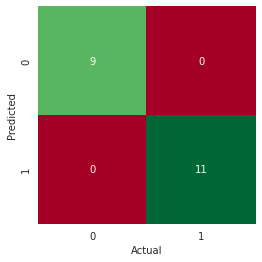

In [ ]:
def clf_confusion_matrix(model, y_true, y_pred):
  cm_knn = metrics.confusion_matrix(y_true, y_pred)
  sns.heatmap(cm_knn, square=True, annot=True, cbar=False, xticklabels=names, yticklabels=names, cmap="RdYlGn")
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()

# model = linear_model.SGDClassifier()
# model.fit(x_train, y_train)
# pred = model.predict(x_test)
clf_confusion_matrix(model, y_test, pred)  

##Evaluate Model with K BestFeatures and Cross Validation

In [ ]:
# automatically select the number of features for RFE
def clf_Evaluate_Model_with_K_BestFeatures(X, Y, reg=False, number_of_selected_features=1, score_choice=0):
  
  if reg:
    rfe = feature_selection.RFE(estimator=tree.DecisionTreeRegressor(), n_features_to_select=number_of_selected_features)
    model = tree.DecisionTreeRegressor()
  else:  
    rfe = feature_selection.RFE(estimator=tree.DecisionTreeRegressor(), n_features_to_select=number_of_selected_features)
    rfe = feature_selection.RFECV(estimator=tree.DecisionTreeClassifier(), min_features_to_select=number_of_selected_features)
    model = tree.DecisionTreeClassifier()

  my_pipeline = pipeline.Pipeline(steps=[('s',rfe),('m',model)])

  # automatically choose the number of features
  cv = model_selection.RepeatedStratifiedKFold(n_splits=10, n_repeats=8, random_state=64)
  
  n_scores = model_selection.cross_val_score(my_pipeline, X, Y, scoring="accuracy", cv=cv, n_jobs=-1, error_score='raise')

  # report performance
  print(n_scores)
  print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

## It doesn't work with Regression data

# Evaluate_Model_with_K_BestFeatures(X, Y, reg=True, number_of_selected_features=5)
Evaluate_Model_with_K_BestFeatures(x, y, reg=False, number_of_selected_features=5)

[1.  1.  0.8 1.  1.  1.  0.8 0.9 1.  0.8 1.  1.  1.  0.8 1.  1.  0.9 0.7
 1.  0.9 0.8 0.9 0.9 1.  1.  0.9 1.  1.  0.9 0.9 0.8 0.9 0.9 1.  1.  0.9
 0.9 1.  1.  1.  0.8 1.  1.  1.  0.9 0.9 0.9 0.9 1.  1.  1.  1.  1.  0.9
 0.8 0.9 0.9 1.  0.8 1.  0.8 0.9 0.9 1.  0.8 1.  0.9 0.8 1.  0.9 0.8 1.
 1.  1.  1.  1.  0.9 0.9 0.9 1. ]
Accuracy: 0.931 (0.078)


##Bivariate Analysis

### Box Plot Chart

(100, 10)

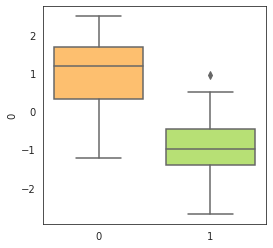

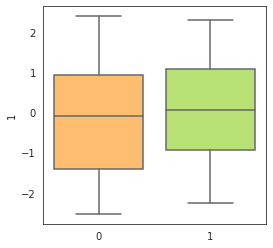

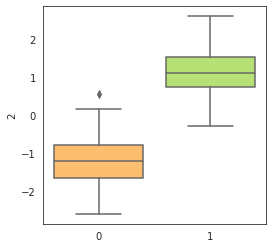

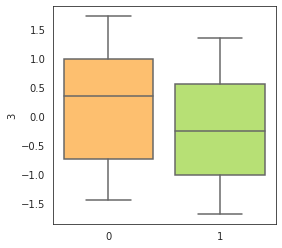

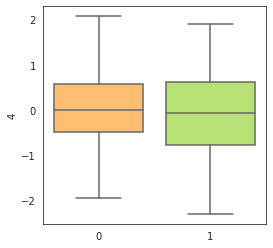

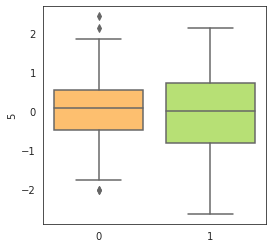

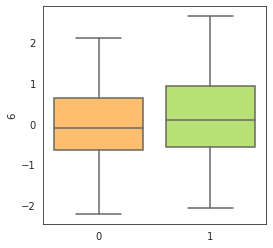

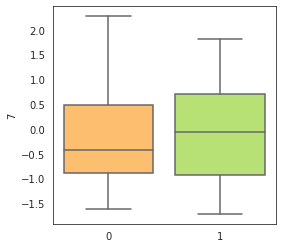

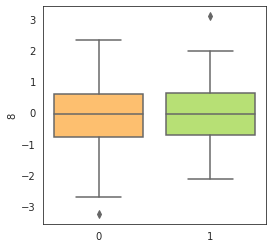

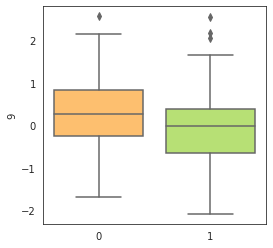

In [ ]:
def clf_boxplot(X, Y, sizes=4):
  for i in range(X.shape[1]):
    plt.figure(figsize=(sizes, sizes))
    sns.boxplot(x=Y, y=X[X.columns[i]], palette="RdYlGn", saturation=1)

clf_boxplot(xd, y)

###Grouped Bar Chart

In [ ]:
def clf_countplot(X, Y, sizes=4):
  print("Remmember this plot is only for categorical data")
  if len(X) == 0: return "Sorry, Please Enter categorical data"
  for i in range(X.shape[1]):
    plt.figure(figsize=(sizes, sizes))
    sns.countplot(x=X[X.columns[i]], hue=Y, palette="RdYlGn", saturation=1)


clf_countplot(xd, y)    

Remmember this plot is only for categorical data


'Sorry, Please Enter categorical data'

#All Types

##HeatMap

values near to 0, has less correlation
but, values near 1 or -1 has the most correlation


          0         1         2   ...        8         9         10
0   1.000000  0.021816  0.004334  ... -0.034877  0.030781  0.245161
1   0.021816  1.000000  0.021765  ... -0.011776 -0.001657  0.281173
2   0.004334  0.021765  1.000000  ... -0.038984  0.006862  0.083402
3  -0.003274 -0.025189  0.017626  ...  0.037012  0.007455  0.239129
4   0.005068  0.010304  0.026217  ...  0.053263 -0.057937  0.141101
5  -0.031403 -0.050734  0.014771  ... -0.077144  0.059830  0.401775
6   0.052017 -0.000038  0.049019  ...  0.006587  0.015440  0.423576
7   0.007063  0.006033 -0.047258  ...  0.049481 -0.023052  0.564780
8  -0.034877 -0.011776 -0.038984  ...  1.000000  0.045036  0.041862
9   0.030781 -0.001657  0.006862  ...  0.045036  1.000000  0.313603
10  0.245161  0.281173  0.083402  ...  0.041862  0.313603  1.000000

[11 rows x 11 columns]
          10        2 
10  1.000000  0.083402
2   0.083402  1.000000


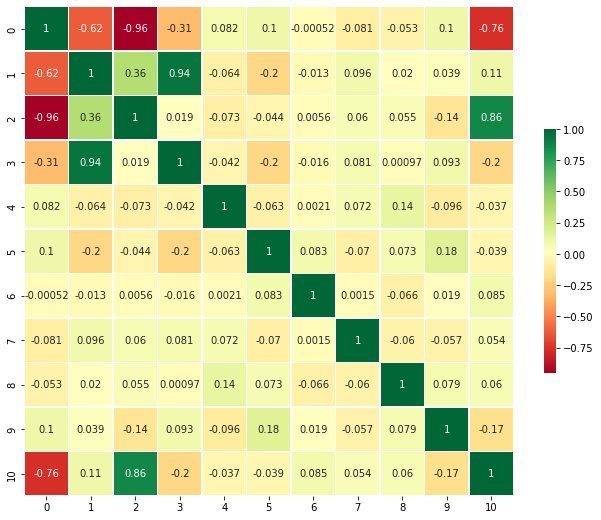

In [ ]:
def heatmap(data, with_mask=True):
  corr = data.corr()
  f, ax = plt.subplots(figsize=(11, 9))

  if ~with_mask:
    mask = None
  else:
    mask = np.triu(np.ones_like(corr, dtype=np.bool))
  
  sns.heatmap(corr, mask=mask, cmap="RdYlGn", annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

print(Data.corr(), end="\n")
print(Data[[10, 2]].corr(), end="\n")
heatmap(data, False)

##Importance Plot

Higher, better

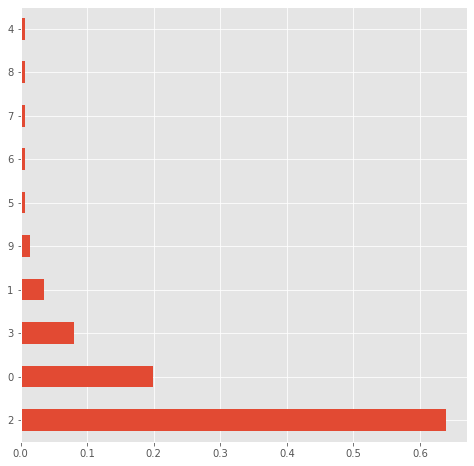

In [ ]:
def importance_plot(X, Y, size=8):
  model = ensemble.ExtraTreesRegressor()
  model.fit(X, Y)
  plt.style.use('ggplot')
  plt.figure(figsize=(size,size))
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  feat_importances.nlargest(50).plot(kind='barh')
  plt.show()

importance_plot(xd,y)

##Multicollinearity


detect by:  variance inflation factor or the VIF for each predicting variable.

detect:  remove features with scores of more than 10


1 <= VIF <= inf

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity(Data):
    Data = Data[~Data.isin([np.nan, np.inf, -np.inf]).any(1)]
    vif_data = pd.DataFrame()
    vif_data["feature"] = Data.columns
    vif_data["VIF"] = [variance_inflation_factor(Data.values, i) for i in range(len(Data.columns))]
    return vif_data

multicollinearity(Data)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,0,inf
1,1,inf
2,2,inf
3,3,inf
4,4,1.054893
5,5,1.106983
6,6,1.025431
7,7,1.037043
8,8,1.059177
9,9,1.107528


##Feature importances

WARNING;
    If You Enter the wrong data type, it will train for so long. and won't work properly, reg == True
Accuracy: 100.00%


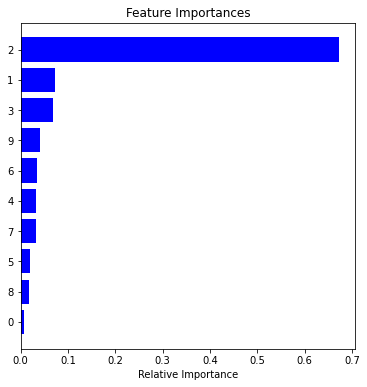

Thresh=0.008, n=10, Accuracy: 100.00%
Thresh=0.017, n=9, Accuracy: 100.00%
Thresh=0.019, n=8, Accuracy: 100.00%
Thresh=0.033, n=7, Accuracy: 100.00%
Thresh=0.033, n=6, Accuracy: 100.00%
Thresh=0.034, n=5, Accuracy: 100.00%
Thresh=0.042, n=4, Accuracy: 100.00%
Thresh=0.068, n=3, Accuracy: 100.00%
Thresh=0.073, n=2, Accuracy: 100.00%
Thresh=0.673, n=1, Accuracy: 100.00%


In [ ]:
import xgboost
def Features_Importance(X, Y, Xte, Yte, reg=True):
    print("""WARNING;
    If You Enter the wrong data type, it will train for so long. and won't work properly, reg == True""")
    if reg:
      model = xgboost.XGBRegressor()
      model.fit(X, Y)
      y_pred = model.predict(Xte)
      predictions = [value for value in y_pred]
    else:
      model = xgboost.XGBClassifier()
      model.fit(X, Y)
      y_pred = model.predict(Xte)
      predictions = [round(value) for value in y_pred]
    
    accuracy = metrics.r2_score(Yte, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    importances = model.feature_importances_
    indices = np.argsort(importances)
    thresholds = np.sort(importances)
    plt.figure(figsize=(6, 6))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

    for thresh in thresholds:
      # select features using threshold
      selection = feature_selection.SelectFromModel(model, threshold=thresh, prefit=True)
      select_X_train = selection.transform(X)

      if reg:
        selection_model = xgboost.XGBRegressor()
        selection_model.fit(select_X_train, Y)
        select_x_test = selection.transform(Xte)
        y_pred = selection_model.predict(select_x_test)
        predictions = [value for value in y_pred]
      else:
        selection_model = xgboost.XGBClassifier()
        selection_model.fit(select_X_train, Y)
        select_x_test = selection.transform(Xte)
        y_pred = selection_model.predict(select_x_test)
        predictions = [round(value) for value in y_pred]

      accuracy = metrics.r2_score(Yte, predictions)
      print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

# Features_Importance(X_train, Y_train, X_test, Y_test)      
Features_Importance(x_train, y_train, x_test, y_test, False)      

##Automated feature selection

###Variance threshold
In statistics, variance is the squared deviation of a variable from its mean, in other words, how far are the data points spread out for a given variable?


Suppose we were building a machine learning model to detect breast cancer and the data set had a boolean variable for gender.

This data set is likely to consist almost entirely of one gender and therefore nearly all data points would be 1. This variable would have extremely low variance and would be not at all useful for predicting the target variable.


This is one of the most simple approaches to feature selection. The scikit-learn library has a method called VarianceThreshold . This method takes a threshold value and when fitted to a feature set will remove any features below this threshold. The default value for the threshold is 0 and this will remove any features with zero variance, or in other words where all values are the same.

In [ ]:
def afs_variance_threshold(X, ret=False):
  selector = feature_selection.VarianceThreshold()
  print("Original feature shape:", X.shape)
  new_X = selector.fit_transform(X)
  print("Transformed feature shape:", new_X.shape, end="\n")
  if ret:
    return new_X

afs_variance_threshold(X)

Original feature shape: (1000, 10)
Transformed feature shape: (1000, 10)


###Recursive feature elimination

In [ ]:
def afs_recursive(X, Y, ret=False):
  X_normalized = preprocessing.normalize(X, norm='l2')
  estimator = svm.SVR(kernel="linear")
  selector = feature_selection.RFECV(estimator, step=1, cv=2)
  selector = selector.fit(X, Y)
  print("Features selected", selector.support_)
  print("Feature ranking", selector.ranking_)
  if ret:
    return selector.fit_transform(X, Y)

afs_recursive(X, Y)    

Features selected [ True  True  True  True  True  True  True  True  True  True]
Feature ranking [1 1 1 1 1 1 1 1 1 1]


##Filter Method
One of the best feature selection ways with filtering


####based on chi-square, ANVOA and mutual information


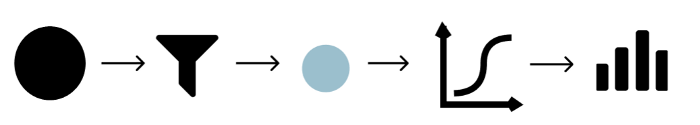

###Univariate feature selection

Univariate feature selection applies univariate statistical tests to features and selects those which perform the best in these tests. Univariate tests are tests which involve only one dependent variable.

This includes analysis of variance (ANOVA), linear regressions and t-tests of means.

###It chooses the most important features to the target


Feature 0: 44.971704
Feature 1: 75.685081
Feature 2: 4.035596
Feature 3: 45.068220
Feature 4: 12.786995
Feature 5: 174.474595
Feature 6: 173.041404
Feature 7: 363.498773
Feature 8: 0.821048
Feature 9: 86.494142


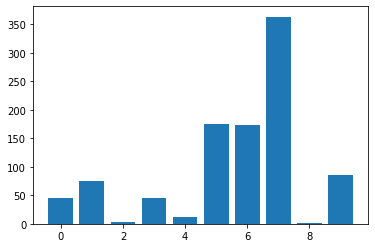

In [ ]:
def univariate_feature_selection(X, Y, Xte, hints=False,sf_choice=0):
	score_functions = ["f_classif","mutual_info_classif", "chi2","f_regression","mutual_info_regression","SelectPercentile","SelectFdr","SelectFwe","GenericUnivariateSelect"]
	score_functions = [feature_selection.f_classif, feature_selection.mutual_info_classif, feature_selection.chi2, feature_selection.f_regression, feature_selection.mutual_info_regression, feature_selection.SelectPercentile, feature_selection.SelectPercentile, feature_selection.SelectFdr,feature_selection.SelectFwe, feature_selection.GenericUnivariateSelect]

	if hints:
		print(""" SelectKBest score function, choices
		f_classif ===> 0,
		mutual_info_classif ===> 1,
		chi2 ===> 2,
		f_regression ===> 3,
		mutual_info_regression ===> 4
		# There are some that I don't understand, so I don't put them in the list, but I will
		SelectPercentile ===> 5,
		SelectFdr  ===> 6,
		SelectFwe ===> 7,
		GenericUnivariateSelect ===> 8
		""")
	selection_model = feature_selection.SelectKBest(score_func=score_functions[sf_choice], k='all')  # Mutual Information Feature Selection
	selection_model.fit(X, Y)
	X_train_selected = selection_model.transform(X)
	X_test_selected = selection_model.transform(Xte)
 
	socres = selection_model.scores_
	for i in range(len(socres)):
		print(f'Feature_{i} is: {X.columns[i]} :==> {round(socres[i], 4)}')
	plt.bar([i for i in range(len(socres))], socres)
	plt.show()

# X_train_fs, X_test_fs, fs = univariate_feature_selection(X_train, Y_train, X_test, sf_choice=3)
# X_train_fs, X_test_fs, fs = univariate_feature_selection(x_train, y_train, x_test, hints=False, sf_choice=0)

### The best method for Tunning
It selects the best parameters for the model

In [ ]:
def model_parameters_chooser(X, Y, model, hints=True, reg=True, sf_choice=0, score_choice=0):

  Clustering_scores=["adjusted_mutual_info_score","adjusted_rand_score","completeness_score","fowlkes_mallows_score","homogeneity_score","mutual_info_score","normalized_mutual_info_score","rand_score","v_measure_score"]
  Regression_scores = ["explained_variance","max_error","neg_mean_absolute_error","neg_mean_squared_error","neg_root_mean_squared_error","neg_mean_squared_log_error","neg_median_absolute_error","r2","neg_mean_poisson_deviance","neg_mean_gamma_devian"]
  Classification_socres = ["accuracy","balanced_accuracy","top_k_accuracy","average_precision","neg_brier_score","f1","f1_micro","f1_weighted","f1_samples","neg_log_loss","precision","recall","jaccard","roc_auc","roc_auc_ovr","roc_auc_ovr_weighted"]
  
  if reg:
    score = Regression_scores[score_choice]
  else:
    score = Classification_socres[score_choice]

  score_functions = ["f_classif","mutual_info_classif", "chi2","f_regression","mutual_info_regression","SelectPercentile","SelectFdr","SelectFwe","GenericUnivariateSelect"]
  score_functions = [feature_selection.f_classif, feature_selection.mutual_info_classif, feature_selection.chi2, feature_selection.f_regression, feature_selection.mutual_info_regression, feature_selection.SelectPercentile, feature_selection.SelectPercentile, feature_selection.SelectFdr,feature_selection.SelectFwe, feature_selection.GenericUnivariateSelect]

  if hints:
    print(""" SelectKBest score function, choices
    f_classif ===> 0,
    mutual_info_classif ===> 1,
    chi2 ===> 2,
    f_regression ===> 3,
    mutual_info_regression ===> 4
    # There are some that I don't understand, so I don't put them in the list, but I will
    SelectPercentile ===> 5,
    SelectFdr  ===> 6,
    SelectFwe ===> 7,
    GenericUnivariateSelect ===> 8
    """)

    print("""Regression Scores
    explained_variance ===> 0,
    max_error ===> 1,
    neg_mean_absolute_error ===> 2,
    neg_mean_squared_error ===> 3,
    neg_root_mean_squared_error ===> 4,
    neg_mean_squared_log_error ===> 5,
    neg_median_absolute_error ===> 6,
    r2 ===> 7
    neg_mean_poisson_deviance ===> 8,
    neg_mean_gamma_devian ===> 9
    """)  

    print("""Classification Scores
    accuracy ===> 0,
    balanced_accuracy ===> 1,
    top_k_accuracy ===> 2,
    average_precision ===> 3,
    neg_brier_score ===> 4,
    f1 ===> 5,
    f1_micro ===> 6,
    f1_weighted ===> 7,
    f1_samples ===> 8,
    neg_log_loss ===> 9,
    precision ===> 10,
    recall ===> 11,
    jaccard ===> 12,
    roc_auc ===> 13,
    roc_auc_ovr ===> 14,
    roc_auc_ovr_weighted ===> 15
    """)

    print("""Clustering Scores
    adjusted_mutual_info_score ===> 0,
    adjusted_rand_score ===> 1,
    completeness_score ===> 2,
    fowlkes_mallows_score ===> 3,
    homogeneity_score ===> 4,
    mutual_info_score ===> 5,
    normalized_mutual_info_score ===> 6,
    rand_score ===> 7,
    v_measure_score ===> 8
    """)
  cv = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=64)
  featureSelectioner = feature_selection.SelectKBest(score_func=score_functions[sf_choice])
  pipeLine =pipeline.Pipeline(steps=[('sel',featureSelectioner), ('lr', model)])
  grid = dict()
  grid['sel__k'] = [i for i in range(X.shape[1]//10, X.shape[1]+1)]
  search = model_selection.GridSearchCV(pipeLine, grid, scoring=score, n_jobs=-1, cv=cv)
  results = search.fit(X, Y)

  print('Best MAE: %.3f' % results.best_score_)
  print('Best Config: %s' % results.best_params_, end="\n")
  # summarize all
  means = results.cv_results_['mean_test_score']
  params = results.cv_results_['params']
  for mean, param in zip(means, params):
      print(">%.3f with: %r" % (mean, param))


clf_model =linear_model.LogisticRegressionCV()
reg_model = linear_model.LinearRegression()

model_parameters_chooser(x, y, clf_model, hints=False,reg=False, sf_choice=0)
# model_parameters_chooser(X, Y, reg_model, hints=False,reg=True, sf_choice=0) 

Best MAE: 0.980
Best Config: {'sel__k': 2}
>0.937 with: {'sel__k': 1}
>0.980 with: {'sel__k': 2}
>0.980 with: {'sel__k': 3}
>0.973 with: {'sel__k': 4}
>0.973 with: {'sel__k': 5}
>0.963 with: {'sel__k': 6}
>0.953 with: {'sel__k': 7}
>0.947 with: {'sel__k': 8}
>0.950 with: {'sel__k': 9}
>0.943 with: {'sel__k': 10}


##Wrapper Methods


####based on forward selection and backward elimination

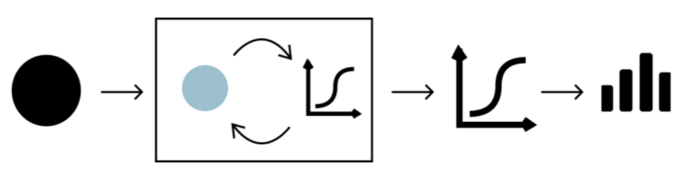


###Forward Selection

Forward Selection starts with no features in the model and incrementally adds one feature to the feature subset at a time. During each iteration, the new feature is chosen based on the evaluation of the model trained by the feature subset.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

accuracy_df = pd.DataFrame({"feature count": [], "accuracy": [], "score function": []})

for i in range(1, len(temp_data.columns)-1):
  sfs = SFS(linear_model.LogisticRegression(), 
            k_features= i, forward=True, scoring="accuracy")
  x_train_seleceted = sfs.fit_transform(x_train, y_train)
  reg = linear_model.LogisticRegression()
  y_pred = reg.predict(x_test[sfs.k_features_names_])
  sfs_accuracy = metrics.accuracy_score(t_test, y_pred)
  new_record = {"feature count": round(i), "accuracy": round(accuracy, 3), "score function": func_name}
  accuracy_df = accuracy_df.append(new_record, ignore_index-True)


print(accuracy_df)    
plt.figure(figsize=(10, 10))
sns.lineplot(data=accuracy_df, x="feature count", y="accuracy", hue="score function", palette="GnBu")  

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


###1. Backward Elimination

####A good way to show the bad features (each attr near 1, is worse, so we will remove it)


Simply put, it is just the opposite of the forward selection, starting with including all features to train the model. Then, features are iteratively removed from the feature subset based on whether they contribute to the model performance.

In [ ]:
def backward_elimination(X, Y):
  cols = list(X.columns)
  pmax = 1
  while (len(cols)>0):
      model_pvalues_list = []
      selected_X = X[cols]
      #Adding constant column of ones, mandatory for sm.OLS model
      selected_X = statsmodels.api.add_constant(selected_X)
      model = statsmodels.api.OLS(Y, selected_X).fit()
      print(f"The Model's PValues are: \n{model.pvalues}")
      model_pvalues_list  = pd.Series(model.pvalues.values[1:],index = cols)      
      pmax = max(model_pvalues_list)
      feature_with_p_max = model_pvalues_list.idxmax()
      if(pmax > 0.05):
          cols.remove(feature_with_p_max)
      else:
          break
  selected_features_BE = cols
  # print(f"The Selected Features are: \n{selected_features_BE}")
  return selected_features_BE

backward_elimination(Xd, Y)  

The Model's PValues are: 
const    0.805926
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
dtype: float64


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

###2. Embedded Method

Best alpha using built-in Lasso(CV): 1.000000
Best score using built-in Lasso(CV): 0.999623
Lasso picked 10 variables and eliminated the other 0 variables


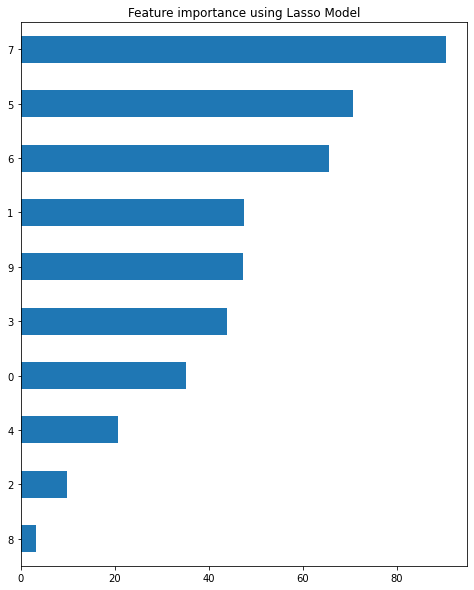

In [ ]:
def embeded_method(X, Y, reg=True):
  if reg:
    model = linear_model.Lasso()
    model.fit(X, Y)
    model_alpha = model.alpha
  else:
    model = linear_model.LassoCV()
    model.fit(X, Y)
    model_alpha = model.alpha_

  print("Best alpha using built-in Lasso(CV): %f" % model_alpha)
  print("Best score using built-in Lasso(CV): %f" %model.score(X, Y))
  coef = pd.Series(model.coef_, index = X.columns)
  print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
  imp_coef = coef.sort_values()
  matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
  imp_coef.plot(kind = "barh")
  plt.title("Feature importance using Lasso Model")

# embeded_method(xd, y, False)  
embeded_method(Xd, Y)  

#Classification Prediction Visualization

In [ ]:
# x, y =  datasets.make_classification(n_samples=300, n_features=10, random_state=42)
x, y =  datasets.make_classification(n_samples=300, n_features=3, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1)
xd = pd.DataFrame(x)
yd = pd.DataFrame(y)
x_train, x_test, y_train, y_test = model_selection.train_test_split(xd, y, random_state=42, test_size=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

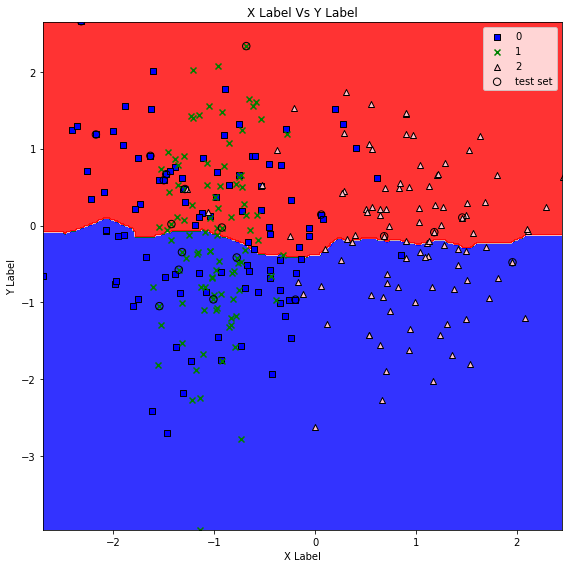

In [ ]:
def plot_decision_regions(X, y, clf, test_size=0, test_idx=None, resolution=0.02, fig_size=(8, 8), xlabel='X Label', ylabel='Y Label', save_fig_dir='$'):
  
  markers = ('s', 'x', '^', 'v')
  colors = ('red', 'blue', 'orange', 'pink', 'green', 'white', 'purple', 'white')
  cmap = matplotlib.colors.ListedColormap(np.random.choice(colors, len(np.unique(y))+1, replace=False))

  x_first_min, x_first_max = X[:, 0].min(), X[:, 0].max()
  x_second_min, x_second_max = X[:, 1].min(), X[:, 1].max()
  X1, X2 = np.meshgrid(np.arange(x_first_min, x_first_max, resolution), np.arange(x_second_min, x_second_max, resolution))
  pred = clf.predict(np.array([X1.ravel(), X2.ravel()]).T)  
  pred = pred.reshape(X1.shape)

  plt.figure(figsize=fig_size)
  plt.title(f'{xlabel} Vs {ylabel}')
  plt.contourf(X1, X2, pred, alpha=0.8, cmap=cmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())

  rand_idx = np.random.choice(range(1, X.shape[0]), size=20, replace=False)
  for i, label in enumerate(np.unique(y)):
    plt.scatter(x=X[y == label, 0], y = X[y == label, 1], c=cmap(i), edgecolors='black', marker=markers[i], label=label)

  if test_size > 0:
    x_test, y_test = X[rand_idx, :], y[rand_idx]
    plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0, edgecolor='black', linewidths=1, marker='o', cmap=cmap(-1),s=55, label='test set')


  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend()
  plt.tight_layout()
  plt.show()

  if save_fig_dir != '$':
    plt.savefig(f'{save_fig_dir}/picture.png', dpi=300)
  return

  
X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, clf=classifier, test_size=20, test_idx=range(105, 150))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/usr/local/lib/python3.7/dist-packages/ipykern

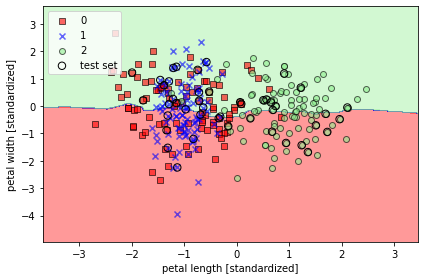

In [ ]:

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

X_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined,
                      classifier=classifier, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target


In [ ]:
X.shape

(150, 2)